In [1]:
import os
os.chdir('/Users/xinyiwan/Downloads/fintech_545/risk_management')
import library

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import random
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from datetime import datetime
from scipy.optimize import fsolve

## Problem 1

In [3]:
T = datetime(2023,3,17)-datetime(2023,3,3)
print("the time to maturity:", T.days, "days")

the time to maturity: 14 days


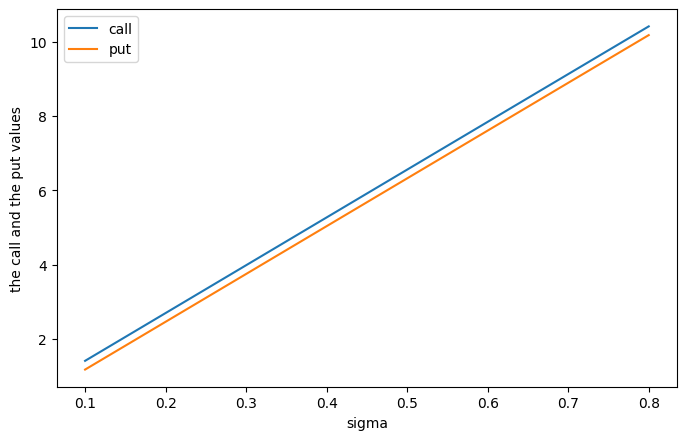

In [4]:
def black_scholes(S, b, r, T, X, sigma, option):
    d1 = (np.log(S/X)+(b+sigma**2/2)*T)/sigma/T**0.5
    d2 = d1 - sigma*T**0.5
    if option=='call':
        return S*np.exp((b-r)*T)*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2)
    else:
        return X*np.exp(-r*T)*stats.norm.cdf(-d2)-S*np.exp((b-r)*T)*stats.norm.cdf(-d1)

S = 165
r = 0.0425
b = r-0.0053 # Merton 1973 Options on Equities paying a continuous dividend rate 𝑞
T = T.days/365
X = 165
sigmas = np.linspace(0.1,0.8,70)
list_call, list_put = [], []
for sigma in sigmas:
    list_call.append(black_scholes(S,b,r,T,X,sigma,'call'))
    list_put.append(black_scholes(S,b,r,T,X,sigma,'put'))
plt.figure(figsize=(8, 5), dpi=100)
plt.plot(sigmas,list_call, label='call')
plt.plot(sigmas,list_put, label='put')
plt.xlabel("sigma")
plt.ylabel("the call and the put values")
plt.legend()
# plt.savefig('prob1.png', dpi=180, facecolor='w')

## Problem 2

<pre>
● Current Date 03/03/2023
● Options Expiration Date 03/17/2023
● Risk Free Rate of 4.25%
● Continuously Compounding Coupon of 0.53%
● Current AAPL price is 151.03

In [5]:
os.chdir('/Users/xinyiwan/Downloads/fintech_545/Week6')
aapl = pd.read_csv("AAPL_Options.csv")
aapl

,Stock,Expiration,Type,Strike,Last Price
0,AAPL,4/21/2023,Call,125,27.300
1,AAPL,4/21/2023,Call,130,22.575
2,AAPL,4/21/2023,Call,135,17.750
3,AAPL,4/21/2023,Call,140,13.850
4,AAPL,4/21/2023,Call,145,9.975
5,AAPL,4/21/2023,Call,150,6.700
6,AAPL,4/21/2023,Call,155,4.050
7,AAPL,4/21/2023,Call,160,2.210
8,AAPL,4/21/2023,Call,165,1.035
9,AAPL,4/21/2023,Call,170,0.460


In [6]:
def implied_vol(S,b,r,T,X,price,option):
    f = lambda sigma: (black_scholes(S,b,r,T,X,sigma,option)-price)
    return fsolve(f, x0 = 0.2, maxfev=10000)[0] 

In [7]:
S = 151.03
r = 0.0425
b = r-0.0053
T = (datetime(2023,4,21)-datetime(2023,3,3)).days/365

for i in range(len(aapl)):
    X = aapl.loc[i,"Strike"]
    price = aapl.loc[i,"Last Price"]
    if aapl.loc[i,"Type"]=="Call":
        aapl.loc[i,"Implied Volatility"] = implied_vol(S,b,r,T,X,price,'call')
    else:
        aapl.loc[i,"Implied Volatility"] = implied_vol(S,b,r,T,X,price,'put')
aapl

,Stock,Expiration,Type,Strike,Last Price,Implied Volatility
0,AAPL,4/21/2023,Call,125,27.300,0.374597
1,AAPL,4/21/2023,Call,130,22.575,0.342351
2,AAPL,4/21/2023,Call,135,17.750,0.292522
3,AAPL,4/21/2023,Call,140,13.850,0.299358
4,AAPL,4/21/2023,Call,145,9.975,0.278743
5,AAPL,4/21/2023,Call,150,6.700,0.263141
6,AAPL,4/21/2023,Call,155,4.050,0.246828
7,AAPL,4/21/2023,Call,160,2.210,0.235242
8,AAPL,4/21/2023,Call,165,1.035,0.223567
9,AAPL,4/21/2023,Call,170,0.460,0.219339


Text(152.03, 0.37, 'current price')

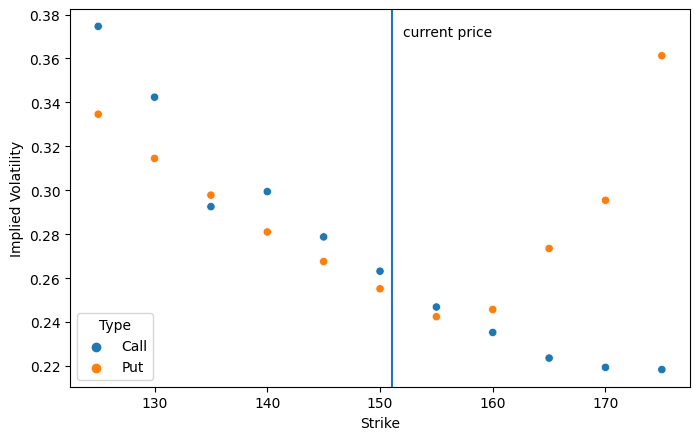

In [8]:
plt.figure(figsize=(8, 5), dpi=100)
sns.scatterplot(data=aapl, x="Strike", y="Implied Volatility", hue="Type")
plt.axvline(S)
plt.text(S+1,0.37,'current price')
# plt.savefig('prob2.png', dpi=180, facecolor='w')

If the volatility smile for put options is concave, with the lowest point greater than the current price, and the
volatility smile for call options is only slightly concave (nearly linear), it suggests that the market is pricing
in a higher probability of larger downward moves in the underlying asset's price compared to larger upward moves.
If the intersection of the put options smile and the call options smile is higher than the current price, it indicates
that the market is pricing in a higher future volatility than the current realized volatility. This could be due to
expectations of upcoming events, such as economic releases, geopolitical risks, or earnings announcements that could
potentially cause significant price movements.
Taken together, these observations suggest that the market is pricing in a higher likelihood of a significant downward
move in the underlying asset's price, with a relatively lower probability of a significant upward move. Additionally,
the higher implied volatility at the intersection of the put and call smiles suggests that options prices are higher
than what would be expected based on the current realized volatility of the underlying asset. This could potentially
provide opportunities for traders to take advantage of the mispricing by selling options or implementing other option
strategies.

If the volatility smile for call options is only slightly concave (nearly linear), it suggests that the market is
pricing in a relatively lower probability of large upward moves in the underlying asset's price. This could indicate
a more stable or bullish market sentiment.

## Problem 3

In [9]:
port = pd.read_csv('problem3.csv')
port

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice
0,Straddle,Option,AAPL,1,Call,4/21/2023,150.0,6.80
1,Straddle,Option,AAPL,1,Put,4/21/2023,150.0,4.85
2,SynLong,Option,AAPL,1,Call,4/21/2023,150.0,6.80
3,SynLong,Option,AAPL,-1,Put,4/21/2023,150.0,4.85
4,CallSpread,Option,AAPL,1,Call,4/21/2023,150.0,6.80
5,CallSpread,Option,AAPL,-1,Call,4/21/2023,160.0,2.21
6,PutSpread,Option,AAPL,1,Put,4/21/2023,150.0,4.85
7,PutSpread,Option,AAPL,-1,Put,4/21/2023,140.0,1.84
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,151.03
9,Call,Option,AAPL,1,Call,4/21/2023,150.0,6.80


In [10]:
S = 151.03
r = 0.0425
b = r-0.0053
current_date = datetime(2023,3,3)

def portfolio_value(port, S0, r, b, current_date, Ss=np.linspace(50,250,40)):
    port["ExpirationDate"] = pd.to_datetime(port["ExpirationDate"])
    for i in range(len(port)):
        X = port.loc[i,"Strike"]
        price = port.loc[i,"CurrentPrice"]
        T = (port.loc[i,"ExpirationDate"] - current_date).days/365
        if port.loc[i,"OptionType"]=="Call":
            port.loc[i,"Implied Volatility"] = implied_vol(S0,b,r,T,X,price,'call')
        elif port.loc[i,"OptionType"]=="Put":
            port.loc[i,"Implied Volatility"] = implied_vol(S0,b,r,T,X,price,'put')
        else:
            port.loc[i,"Implied Volatility"] = 'NaN'
    
    portfolio = port['Portfolio'].unique().tolist()
    d_values = {}
    for p in portfolio:
        d_values[p] = {}
    
    for i in range(len(Ss)):
        S = Ss[i]
        for j in range(len(port)):
            X = port.loc[j,"Strike"]
            sigma = port.loc[j,"Implied Volatility"]
            p = port.loc[j,"Portfolio"]
            if port.loc[j,"OptionType"]=="Call":
                value = black_scholes(S, b, r, T, X, sigma,'call') * port.loc[j,"Holding"]
            elif port.loc[j,"OptionType"]=="Put":
                value = black_scholes(S, b, r, T, X, sigma,'put') * port.loc[j,"Holding"]
            else:
                value = S * port.loc[j,"Holding"]
            d_values[p][S] = d_values[p].get(S,0) + value
    return d_values

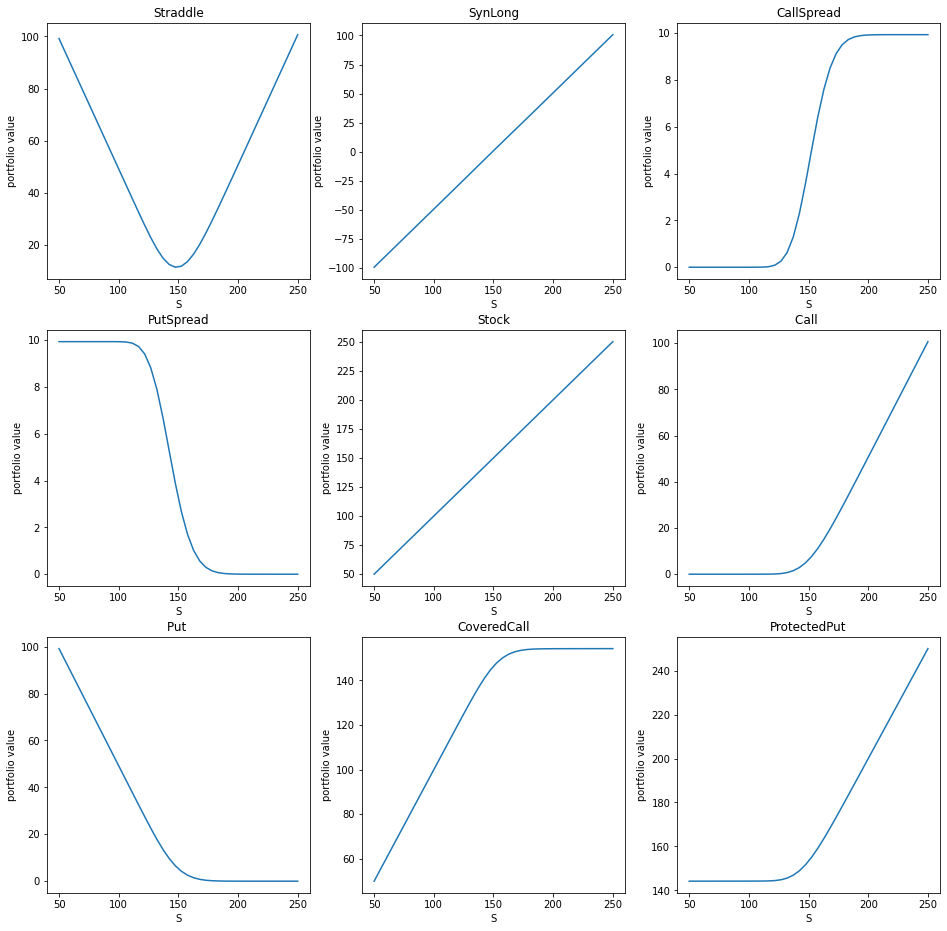

In [11]:
d_values = portfolio_value(port, S, r, b, current_date)

fig, axes = plt.subplots(3, 3, figsize=(16, 16))
i = 0
for key, value in d_values.items():
    sns.lineplot(x = np.linspace(50,250,40), y = value.values(), ax = axes[i//3][i%3])
    axes[i//3][i%3].set_title(key)
    axes[i//3][i%3].set_xlabel('S')
    axes[i//3][i%3].set_ylabel('portfolio value')
    i+=1
# plt.savefig('prob3.png', dpi=180, facecolor='w')

In [12]:
price = pd.read_csv('DailyPrices.csv')
returns = library.return_calculate(price['AAPL'],method='LOG')
returns = [i for i in returns - returns.mean()]

In [13]:
def sim_prices_ar1(returns,current_price,num_step,num_sim=1000):
    ar1 = sm.tsa.ARIMA(returns,order=(1,0,0)).fit()
    alpha_ar1 = ar1.params[0]
    resid = ar1.resid
    sigma = np.std(resid)
    sim_returns = np.zeros((num_sim,num_step))
    for i in range(num_sim):
        sim_returns[i,0] = alpha_ar1*returns[-1]+np.random.normal(0,sigma)
        for j in range(1,num_step):
            sim_returns[i,j] = alpha_ar1*sim_returns[i,j-1]+np.random.normal(0,sigma)
    sim_prices = current_price * np.exp(sim_returns.cumsum(axis=1))
    return sim_prices, sim_returns

random.seed(9)
simulated_prices, simulated_returns = sim_prices_ar1(returns, S, 10)
simulated_prices = simulated_prices[:,-1]

In [14]:
num_sim = 1000
portfolios = np.zeros((len(port['Portfolio'].unique().tolist()), num_sim))
current_date = datetime(2023,3,13)
for i, price in enumerate(simulated_prices):
    d_values = portfolio_value(port, S, r, b, current_date, Ss=[price])
    d_values = {key: value[next(iter(value))] for key, value in d_values.items()} # flatten dict values
    for j, key in enumerate(d_values.keys()):
        portfolios[j, i] = d_values[key]
portfolios.shape

(9, 1000)

In [15]:
curr = [151.03]
curr_port = portfolio_value(port, S, r, b, datetime(2023,3,3), Ss=curr)
curr_port = {key: value[next(iter(value))] for key, value in curr_port.items()}

df = pd.DataFrame.from_dict(curr_port, orient='index', columns=['Price'])
df_portfolios = pd.DataFrame(portfolios, index=df.index)
df = pd.concat([df, df_portfolios], axis=1)
df = pd.DataFrame(df.iloc[:,1:].values - df.iloc[:,0].values[:, np.newaxis], index=df.index)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Straddle,9.514214,6.646539,0.116234,9.949956,0.302639,0.375414,-0.126288,0.302852,2.486739,7.598266,...,0.208315,-0.138924,5.071790,2.675377,1.527927,0.560059,1.211819,1.959950,0.224322,0.758302
SynLong,17.912093,-18.703601,0.781573,18.436138,-6.366525,2.053856,-3.215521,-6.367484,7.663243,15.517552,...,1.284036,-2.907240,12.027441,8.030201,5.580541,2.774811,4.778251,6.571650,1.364547,-8.072384
CallSpread,4.071518,-3.895330,0.219313,4.142290,-1.707638,0.575758,-0.889098,-1.707875,2.072907,3.709493,...,0.360284,-0.805544,3.065016,2.163453,1.538541,0.776500,1.324687,1.796918,0.382856,-2.115808
PutSpread,-2.537274,4.830462,-0.179492,-2.568019,1.634628,-0.458996,0.793240,1.634890,-1.486353,-2.372859,...,-0.291798,0.713816,-2.051608,-1.541565,-1.145069,-0.610075,-1.000853,-1.313427,-0.309563,2.104389
Stock,18.095753,-18.530214,0.783590,18.626147,-6.347955,2.061077,-3.213901,-6.348907,7.717379,15.671017,...,1.287829,-2.906475,12.135204,8.088462,5.613339,2.785992,4.803938,6.614127,1.368659,-8.038892
Call,13.713153,-6.028531,0.448904,14.193047,-3.031943,1.214635,-1.670905,-3.032316,5.074991,11.557909,...,0.746176,-1.523082,8.549616,5.352789,3.554234,1.667435,2.995035,4.265800,0.794435,-3.657041
Put,-4.198940,12.675070,-0.332670,-4.243091,3.334582,-0.839221,1.544616,3.335168,-2.588252,-3.959643,...,-0.537861,1.384158,-3.477825,-2.677412,-2.026307,-1.107376,-1.783216,-2.305850,-0.570112,4.415343
CoveredCall,6.176761,-14.736274,0.443693,6.253715,-4.216854,1.129600,-1.999993,-4.217565,3.617324,5.768832,...,0.719979,-1.796376,4.983279,3.750399,2.794438,1.498174,2.446072,3.200529,0.763595,-5.513316
ProtectedPut,15.416440,-8.244678,0.551752,15.922762,-3.893040,1.481450,-2.104741,-3.893541,5.991898,13.124678,...,0.914334,-1.914907,9.867245,6.307194,4.245803,2.024930,3.594415,5.067201,0.972993,-4.743321


In [16]:
mean = df.mean(axis=1)
var = df.apply(library.var,axis=1)
es = df.apply(library.es,axis=1)

result = pd.concat([mean, var, es], axis=1)
result.columns = ['Mean', 'VaR', 'ES']
result

,Mean,VaR,ES
Straddle,2.658813,0.138180,0.144531
SynLong,0.001118,17.706815,20.712603
CallSpread,0.032579,3.786905,4.045239
PutSpread,0.379652,2.513104,2.705215
Stock,0.061939,17.547137,20.515924
Call,1.329965,5.899570,6.200008
Put,1.328848,4.164096,4.435482
CoveredCall,-1.342873,13.808719,16.656662
ProtectedPut,1.244350,8.036230,8.535641
